In [1]:
# import required modules
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import time
import re
import sys
import numpy as np
from datascience import *
from string import punctuation


%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

## Getting links to all speeches

In [5]:
overview_link = "http://www.presidency.ucsb.edu/sou.php"

In [6]:
# Getting overview page into soup-format
req = requests.get(overview_link)
src = req.text
soup = BeautifulSoup(src, 'lxml')

In [7]:
# Creating a list of all the links to state of the union speeches
links = []
for x in soup.findAll('td', {"class": "ver12"}):
  link = x.find('a', href=True)
  if not link: continue
  link = link["href"]
  if link.find('#') < 0: links.append(link)

In [8]:
# List of alle the relevant links
links

['http://www.presidency.ucsb.edu/ws/index.php?pid=123408',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=102826',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=104596',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=108031',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=111174',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=85753',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=87433',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=88928',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=99000',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=58746',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=65090',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=24446',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=76301',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29643',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29644',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29645',
 'http://www.presidency.ucsb.edu/ws/index.php?pid=29646',
 'http://

## Building Scraper functions

In [9]:
# Building scraper function that takes a link and return a list with the following elements 1) name, 2) year 3)date 4)speech text 
def scrape_speech(url):
    req = requests.get(url)
    src = req.text
    soup = BeautifulSoup(src, 'lxml')
      
    name = soup.find('title').get_text().split(":")[0]
    date_and_year = soup.find('span', {"class": "docdate"}).get_text()
    year = date_and_year.split(",")[1].strip(" ")
    date = date_and_year.split(",")[0]
    rawtext = soup.find('span', {"class": "displaytext"}).get_text()
    
    speech_data = [name, year, date, rawtext]
    return speech_data

In [10]:
scrape_speech(links[0])

['Donald J. Trump',
 '2017',
 'February 28',
 'Thank you very much. Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and citizens of America: Tonight, as we mark the conclusion of our celebration of Black History Month, we are reminded of our Nation\'s path towards civil rights and the work that still remains to be done. Recent threats targeting Jewish community centers and vandalism of Jewish cemeteries, as well as last week\'s shooting in Kansas City, remind us that while we may be a nation divided on policies, we are a country that stands united in condemning hate and evil in all of its very ugly forms. Each American generation passes the torch of truth, liberty, and justice in an unbroken chain, all the way down to the present. That torch is now in our hands, and we will use it to light up the world. I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart. A new chapter of American gr

In [ ]:
corpus = []

for link in links:
    speech_data = scrape_speech(link)
    corpus.append(speech_data)
    time.sleep(5)

In [10]:
len(corpus)

243

In [19]:
corpus[70]

['Dwight D. Eisenhower',
 '1954',
 'January 7',
 "Mr. President, Mr. Speaker, Members of the Eighty-third Congress: It is a high honor again to present to the Congress my views on the state of the Union and to recommend measures to advance the security, prosperity, and well-being of the American people. All branches of this Government--and I venture to say both of our great parties--can support the general objective of the recommendations I make today, for that objective is the building of a stronger America. A nation whose every citizen has good reason for bold hope; where effort is rewarded and prosperity is shared; where freedom expands and peace is secure--that is what I mean by a stronger America. Toward this objective a real momentum has been developed during this Administration's first year in office. We mean to continue that momentum and to increase it. We mean to build a better future for this nation. Much for which we may be thankful has happened during the past year. First o

In [23]:
corpus[1]

['Barack Obama',
 '2013',
 'February 12',
 'Please, everybody, have a seat. Mr. Speaker, Mr. Vice President, Members of Congress, fellow Americans: Fifty-one years ago, John F. Kennedy declared to this Chamber that "the Constitution makes us not rivals for power, but partners for progress." "It is my task," he said, "to report the state of the Union; to improve it is the task of us all." Tonight, thanks to the grit and determination of the American people, there is much progress to report. After a decade of grinding war, our brave men and women in uniform are coming home. After years of grueling recession, our businesses have created over 6 million new jobs. We buy more American cars than we have in 5 years and less foreign oil than we have in 20. Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before. So together, we have cleared away the rubble of crisis, and we can say with renewed confidence

In [26]:
t = Table().empty(make_array("Name", "Year", "Date", "Text"))
t

C:\ProgramData\Anaconda3\lib\site-packages\datascience\tables.py:81: FutureWarning: Table.empty(labels) is deprecated. Use Table(labels)
  warnings.warn("Table.empty(labels) is deprecated. Use Table(labels)", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\datascience\tables.py:49: FutureWarning: Two-argument __init__ is deprecated. Use Table().with_columns(...)
  warnings.warn("Two-argument __init__ is deprecated. Use Table().with_columns(...)", FutureWarning)


Name,Year,Date,Text


In [84]:
corpus_table = t.with_rows(corpus)
corpus_table

Name,Year,Date,Text
Donald J. Trump,2017,February 28,"Thank you very much. Mr. Speaker, Mr. Vice President, Me ..."
Barack Obama,2013,February 12,"Please, everybody, have a seat. Mr. Speaker, Mr. Vice Pr ..."
Barack Obama,2014,January 28,"The President. Mr. Speaker, Mr. Vice President, Members ..."
Barack Obama,2015,January 20,"The President. Mr. Speaker, Mr. Vice President, Members ..."
Barack Obama,2016,January 12,"Thank you. Mr. Speaker, Mr. Vice President, Members of C ..."
Barack Obama,2009,February 24,"Madam Speaker, Mr. Vice President, Members of Congress, ..."
Barack Obama,2010,January 27,"Madam Speaker, Vice President Biden, Members of Congress ..."
Barack Obama,2011,January 25,"Mr. Speaker, Mr. Vice President, Members of Congress, di ..."
Barack Obama,2012,January 24,"Mr. Speaker, Mr. Vice President, Members of Congress, di ..."
George W. Bush,2005,February 2,"Mr. Speaker, Vice President Cheney, Members of Congress, ..."


In [85]:
#Changing "Years" to floats    
years = corpus_table.apply(float, "Year" )
corpus_table = corpus_table.with_columns("Year_float", years).select("Name", "Year_float", "Date", "Text").relabeled("Year_float","Year")
corpus_table

Name,Year,Date,Text
Donald J. Trump,2017,February 28,"Thank you very much. Mr. Speaker, Mr. Vice President, Me ..."
Barack Obama,2013,February 12,"Please, everybody, have a seat. Mr. Speaker, Mr. Vice Pr ..."
Barack Obama,2014,January 28,"The President. Mr. Speaker, Mr. Vice President, Members ..."
Barack Obama,2015,January 20,"The President. Mr. Speaker, Mr. Vice President, Members ..."
Barack Obama,2016,January 12,"Thank you. Mr. Speaker, Mr. Vice President, Members of C ..."
Barack Obama,2009,February 24,"Madam Speaker, Mr. Vice President, Members of Congress, ..."
Barack Obama,2010,January 27,"Madam Speaker, Vice President Biden, Members of Congress ..."
Barack Obama,2011,January 25,"Mr. Speaker, Mr. Vice President, Members of Congress, di ..."
Barack Obama,2012,January 24,"Mr. Speaker, Mr. Vice President, Members of Congress, di ..."
George W. Bush,2005,February 2,"Mr. Speaker, Vice President Cheney, Members of Congress, ..."


In [33]:
## Exporting data as a CSV
corpus_table.to_csv("corpus_data.csv")

In [100]:
# Importing US Growth Data
e_data_table = Table.read_table("US_growth.csv", sep=";").select(0,1)

In [105]:
# Changing commaseperator from "," to "."
growth_rates = []

for i in e_data_table.column("GDP growth (annual %)"):
    rate = float(i.replace(",", "."))
    growth_rates = np.append(growth_rates, rate)

#Changing "Years" to floats    
years = e_data_table.apply(float, "Year" )

e_data_table = e_data_table.with_columns("Growth Rate", growth_rates, "Year_float", years).select("Year_float", "Growth Rate")
e_data_table = e_data_table.relabeled("Year_float","Year")
e_data_table

Year,Growth Rate
1961,2.3
1962,6.1
1963,4.4
1964,5.8
1965,6.4
1966,6.5
1967,2.5
1968,4.8
1969,3.1
1970,3.20681


In [122]:
# Merging the economic and speech data
full_data = corpus_table.join("Year", e_data_table, "Year")
full_data

Year,Name,Date,Text,Growth Rate
1961,John F. Kennedy,January 30,[As delivered in person before a joint session] Mr. Spea ...,2.3
1961,Dwight D. Eisenhower,January 12,To the Congress of the United States: Once again it is m ...,2.3
1961,Dwight D. Eisenhower,January 12,To the Congress of the United States: Once again it is m ...,2.3
1962,John F. Kennedy,January 11,[As delivered in person before a joint session] Mr. Vice ...,6.1
1963,John F. Kennedy,January 14,[ As delivered in person before a joint session ] Mr. Vi ...,4.4
1964,Lyndon B. Johnson,January 8,[ As delivered in person before a joint session ] Mr. Sp ...,5.8
1965,Lyndon B. Johnson,January 4,"Mr. Speaker, Mr. President, Members of the Congress, my ...",6.4
1966,Lyndon B. Johnson,January 12,[ Delivered in person before a joint session at 9:04 p.m ...,6.5
1967,Lyndon B. Johnson,January 10,[Delivered in person before a joint session at 9:33 p.m. ...,2.5
1968,Lyndon B. Johnson,January 17,[Delivered in person before a joint session at 9:05 p.m. ...,4.8


In [112]:
# Creating a list of index values
index_list = np.arange(0, full_data.num_rows,1)
index_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [119]:
# Adding a column with index values
full_data.with_column("index",index_list)

Year,Name,Date,Text,Growth Rate,index
1961,John F. Kennedy,January 30,[As delivered in person before a joint session] Mr. Spea ...,2.3,0
1961,Dwight D. Eisenhower,January 12,To the Congress of the United States: Once again it is m ...,2.3,1
1961,Dwight D. Eisenhower,January 12,To the Congress of the United States: Once again it is m ...,2.3,2
1962,John F. Kennedy,January 11,[As delivered in person before a joint session] Mr. Vice ...,6.1,3
1963,John F. Kennedy,January 14,[ As delivered in person before a joint session ] Mr. Vi ...,4.4,4
1964,Lyndon B. Johnson,January 8,[ As delivered in person before a joint session ] Mr. Sp ...,5.8,5
1965,Lyndon B. Johnson,January 4,"Mr. Speaker, Mr. President, Members of the Congress, my ...",6.4,6
1966,Lyndon B. Johnson,January 12,[ Delivered in person before a joint session at 9:04 p.m ...,6.5,7
1967,Lyndon B. Johnson,January 10,[Delivered in person before a joint session at 9:33 p.m. ...,2.5,8
1968,Lyndon B. Johnson,January 17,[Delivered in person before a joint session at 9:05 p.m. ...,4.8,9


In [116]:
# list of indices for written speeches
list_of_written=[1,2,14,16, 21, 23, 25, 27, 28]

In [118]:
# Excluding the written speeches so we only have spoken speeches left
final_data = full_data.exclude(list_of_written)
final_data

Year,Name,Date,Text,Growth Rate
1961,John F. Kennedy,January 30,[As delivered in person before a joint session] Mr. Spea ...,2.3
1962,John F. Kennedy,January 11,[As delivered in person before a joint session] Mr. Vice ...,6.1
1963,John F. Kennedy,January 14,[ As delivered in person before a joint session ] Mr. Vi ...,4.4
1964,Lyndon B. Johnson,January 8,[ As delivered in person before a joint session ] Mr. Sp ...,5.8
1965,Lyndon B. Johnson,January 4,"Mr. Speaker, Mr. President, Members of the Congress, my ...",6.4
1966,Lyndon B. Johnson,January 12,[ Delivered in person before a joint session at 9:04 p.m ...,6.5
1967,Lyndon B. Johnson,January 10,[Delivered in person before a joint session at 9:33 p.m. ...,2.5
1968,Lyndon B. Johnson,January 17,[Delivered in person before a joint session at 9:05 p.m. ...,4.8
1969,Lyndon B. Johnson,January 14,"Mr. Speaker, Mr. President, Members of the Congress and ...",3.1
1970,Richard Nixon,January 22,"Mr. Speaker, Mr. President, my colleagues in the Congres ...",3.20681


In [126]:
## Exporting data as a CSV
final_data.to_csv("final_data.csv")

## Data analysis

** Egocentrism **

In [4]:
# Importing US Growth Data
data = Table.read_table("final_data.csv")
data

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 22014: invalid start byte

In [246]:
def egocentrism_function(text):
    """Function has a text as input and return the proportion of egocentric words ("i", "me", "my" and "myself")"""
    text_lower = text.lower().strip()
    text_no_punctuation = ([char for char in text_lower if char not in punctuation])
    text_no_punctuation = "".join(text_no_punctuation)
    text_no_punctuation = text_no_punctuation.replace("im", "i").replace("ill", "i").replace("id", "i").replace("ive", "i")
    words = text_no_punctuation.split()
    
    egocentrims = []
    
    for word in words:
        if word == 'i':
            egocentrims = np.append(egocentrims, 1)
        if word == 'me':
            egocentrims = np.append(egocentrims, 1)
        if word == 'my':
            egocentrims = np.append(egocentrims, 1)
        if word == 'myself':
            egocentrims = np.append(egocentrims, 1)
        else:
            egocentrims = np.append(egocentrims, 0)

    egocentrism_count = np.count_nonzero(egocentrims)
    egocentrism_proportion = egocentrism_count / len(words)
    return egocentrism_proportion

In [247]:
speeches = data.column("Text")
proportions = []

for speech in speeches:
    proportion = egocentrism_function(speech)
    proportions = np.append(proportions, proportion)

proportions

array([ 0.00985317,  0.00698975,  0.00525131, ...,
        0.01316731,  0.01572234,  0.01427386])

In [248]:
data_egocentrism = data.with_column("Egocentrism", proportions)
data_egocentrism

Year,Name,Date,Text,Growth Rate,Egocentrism
1961,John F. Kennedy,January 30,[As delivered in person before a joint session] Mr. Spea ...,2.3,0.00985317
1962,John F. Kennedy,January 11,[As delivered in person before a joint session] Mr. Vice ...,6.1,0.00698975
1963,John F. Kennedy,January 14,[ As delivered in person before a joint session ] Mr. Vi ...,4.4,0.00525131
1964,Lyndon B. Johnson,January 8,[ As delivered in person before a joint session ] Mr. Sp ...,5.8,0.00751174
1965,Lyndon B. Johnson,January 4,"Mr. Speaker, Mr. President, Members of the Congress, my ...",6.4,0.0158946
1966,Lyndon B. Johnson,January 12,[ Delivered in person before a joint session at 9:04 p.m ...,6.5,0.0127273
1967,Lyndon B. Johnson,January 10,[Delivered in person before a joint session at 9:33 p.m. ...,2.5,0.0132078
1968,Lyndon B. Johnson,January 17,[Delivered in person before a joint session at 9:05 p.m. ...,4.8,0.015586
1969,Lyndon B. Johnson,January 14,"Mr. Speaker, Mr. President, Members of the Congress and ...",3.1,0.0278933
1970,Richard Nixon,January 22,"Mr. Speaker, Mr. President, my colleagues in the Congres ...",3.20681,0.0107744


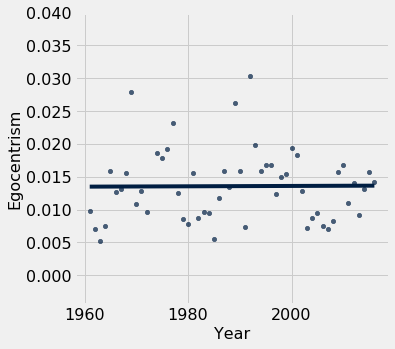

In [249]:
data_egocentrism.scatter("Year", "Egocentrism", fit_line = True)

In [251]:
data_egocentrism.sort("Egocentrism", descending = True)

Year,Name,Date,Text,Growth Rate,Egocentrism
1992,George Bush,January 28,"Mr. Speaker and Mr. President, distinguished Members of ...",3.5554,0.030309
1969,Lyndon B. Johnson,January 14,"Mr. Speaker, Mr. President, Members of the Congress and ...",3.1,0.0278933
1989,George Bush,February 9,"Mr. Speaker, Mr. President, and distinguished Members of ...",3.68052,0.0262391
1977,Gerald R. Ford,January 12,"Mr. Speaker, Mr. Vice President, Members of the 95th Con ...",4.6086,0.0231668
1993,William J. Clinton,February 17,"Mr. President, Mr. Speaker, Members of the House and the ...",2.74586,0.0198657
2000,William J. Clinton,January 27,"Mr. Speaker, Mr. Vice President, Members of Congress, ho ...",4.09218,0.0194497
1976,Gerald R. Ford,January 19,"Mr. Speaker, Mr. Vice President, Members of the 94th Con ...",5.38609,0.0192036
1974,Richard Nixon,January 30,"Mr. Speaker, Mr. President, my colleagues in the Congres ...",-0.517155,0.0185651
2001,George W. Bush,February 27,"Mr. Speaker, Mr. Vice President, Members of Congress: It ...",0.975982,0.0183402
1975,Gerald R. Ford,January 15,"Mr. Speaker, Mr. Vice President, Members of the 94th Con ...",-0.197679,0.0177875


** Language difficulty **

In [290]:
def lix(text):
    """Function has a text as input and compute the lix value"""
    #Cleaning text   
    text_lower = text.lower().strip()
    
    # Compute number of senteces defines by number of ".!:?" 
    end_sentence_punctuation = ".!:?" 
    num_sentences = len(([char for char in text_lower if char in end_sentence_punctuation]))
    
    # Compute number of words
    text_no_punctuation = ([char for char in text_lower if char not in punctuation])
    text_no_punctuation = "".join(text_no_punctuation)
    text_no_punctuation = text_no_punctuation.replace("im", "i").replace("ill", "i").replace("id", "i").replace("ive", "i")
    words = text_no_punctuation.split()
    num_words = len(words)
    
    # Compute number of words above 6 characters
    list_num_char = []
    for i in words:
        num_char = len(i)
        list_num_char = np.append(list_num_char, num_char)
    
    num_long_words = np.count_nonzero(list_num_char > 6)
    
    # Compute lix-score    
    lix_value = (num_words/num_sentences)+(num_long_words*100)/num_words
    
    return lix_value
    

In [291]:
# Run lix-function on every speech
speeches = data.column("Text")
lix_values = make_array()

for speech in speeches:
    lix_value = lix(speech)
    lix_values = np.append(lix_values, lix_value)

lix_values

array([ 50.42118858,  48.88857894,  46.27344631,
       ...,  38.41579264,  37.05628765,
        36.08101742])

In [292]:
data_lix = data_egocentrism.with_column("Lix value", lix_values)
data_lix

Year,Name,Date,Text,Growth Rate,Egocentrism,Lix value
1961,John F. Kennedy,January 30,[As delivered in person before a joint session] Mr. Spea ...,2.3,0.00985317,50.4212
1962,John F. Kennedy,January 11,[As delivered in person before a joint session] Mr. Vice ...,6.1,0.00698975,48.8886
1963,John F. Kennedy,January 14,[ As delivered in person before a joint session ] Mr. Vi ...,4.4,0.00525131,46.2734
1964,Lyndon B. Johnson,January 8,[ As delivered in person before a joint session ] Mr. Sp ...,5.8,0.00751174,45.0524
1965,Lyndon B. Johnson,January 4,"Mr. Speaker, Mr. President, Members of the Congress, my ...",6.4,0.0158946,39.1011
1966,Lyndon B. Johnson,January 12,[ Delivered in person before a joint session at 9:04 p.m ...,6.5,0.0127273,41.8671
1967,Lyndon B. Johnson,January 10,[Delivered in person before a joint session at 9:33 p.m. ...,2.5,0.0132078,41.9647
1968,Lyndon B. Johnson,January 17,[Delivered in person before a joint session at 9:05 p.m. ...,4.8,0.015586,41.1494
1969,Lyndon B. Johnson,January 14,"Mr. Speaker, Mr. President, Members of the Congress and ...",3.1,0.0278933,40.2802
1970,Richard Nixon,January 22,"Mr. Speaker, Mr. President, my colleagues in the Congres ...",3.20681,0.0107744,42.361


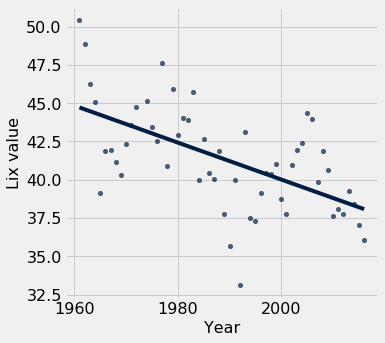

In [293]:
data_lix.scatter("Year", "Lix value", fit_line = True)

In [303]:
np.corrcoef(data_lix["Year"],data_lix["Lix value"])

array([[ 1.        , -0.58295692],
       [-0.58295692,  1.        ]])

** Sentiment analysis **

In [294]:
!pip install --no-cache-dir textblob

In [295]:
from textblob import TextBlob

In [297]:
blob_object = TextBlob(trump)

In [302]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\BjørnAugust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BjørnAugust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BjørnAugust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BjørnAugust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\BjørnAugust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\BjørnAugust\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
Finished.


In [304]:
[s for s in blob_object.sentences]

[Sentence("[As delivered in person before a joint session] Mr. Speaker, Mr. Vice President, Members of the Congress: It is a pleasure to return from whence I came."),
 Sentence("You are among my oldest friends in Washington--and this House is my oldest home."),
 Sentence("It was here, more than 14 years ago, that I first took the oath of Federal office."),
 Sentence("It was here, for 14 years, that I gained both knowledge and inspiration from members of both parties in both Houses--from your wise and generous leaders--and from the pronouncements which I can vividly recall, sitting where you now sit--including the programs of two great Presidents, the undimmed eloquence of Churchill, the soaring idealism of Nehru, the steadfast words of General de Gaulle."),
 Sentence("To speak from this same historic rostrum is a sobering experience."),
 Sentence("To be back among so many friends is a happy one."),
 Sentence("I am confident that that friendship will continue."),
 Sentence("Our Constitu

In [307]:
sentiments = []

for s in blob_object.sentences:
    sentiments.append(s.sentiment.polarity)

sentiments

[0.0,
 0.0,
 0.375,
 0.4149999999999999,
 0.0,
 0.43333333333333335,
 0.5,
 0.2875,
 -0.0625,
 0.0,
 0.0,
 0.0,
 0.21428571428571427,
 0.10000000000000002,
 0.0,
 0.024553571428571425,
 -0.07142857142857142,
 0.6,
 -0.125,
 -0.1,
 0.18333333333333335,
 -0.25,
 0.2,
 0.8,
 -0.15555555555555559,
 0.0,
 0.5,
 -0.5,
 -0.03272727272727273,
 0.03939393939393939,
 0.0,
 0.11666666666666665,
 0.15,
 0.0,
 -0.06666666666666667,
 0.325,
 0.06666666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.15,
 0.2777777777777778,
 0.425,
 -0.08888888888888889,
 -0.15000000000000002,
 0.23106060606060605,
 0.25357142857142856,
 0.0,
 0.0,
 0.1590909090909091,
 0.0,
 0.35,
 0.04,
 0.09315476190476188,
 0.15227272727272728,
 0.09166666666666667,
 0.6,
 0.0,
 0.21666666666666665,
 -0.029166666666666674,
 0.10476190476190476,
 0.03333333333333333,
 0.0,
 0.0,
 0.41818181818181815,
 0.041666666666666664,
 0.051041666666666666,
 0.175,
 0.06071428571428572,
 0.0,
 0.25,
 0.07142857142857142,
 0.04,
 0.13636363636363635,
 

In [309]:
sentiment_score = np.mean(sentiments)
sentiment_score

0.090015072468747417